In [3]:
import numpy as np
import pandas as pd
#import pingouin as pg
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import gridspec as gs
import statsmodels.api as sm
import pylab
import hddm
import seaborn as sns
#import plotNumbers as pn
import importlib
#import circular_stats as cs
import sys
sys.path.append('../preproc/')
#import behav_cleaning as bc
#import resp_cleaning as rc
#from importFunctions import *
import seaborn as sns
#import behav_cleaning as bc
import matplotlib.cbook as cbook
from matplotlib.colors import Normalize
import random
from scipy.stats import norm
import matplotlib.patches as mpatch
sys.path.append('..')
sys.path.append('../preproc/')
import resp_cleaning as rc
import warnings

import paths
import plotting_functions as pf
from matplotlib.patches import ConnectionPatch
import matplotlib.cbook as cbook
import os

importlib.reload(pf)



<module 'plotting_functions' from '/home/malthe/Documents/git/Respiratory_DDM/code/figures/plotting_functions.py'>

In [4]:
data = pd.read_csv(paths.data_master)
supp_figs_path = str(paths.supplementary_figs)
paper_figs_path = str(paths.paper_figs)

//home/malthe/Documents/git/Respiratory_DDM/figures/fad_stimuli/F_000.tif


[]

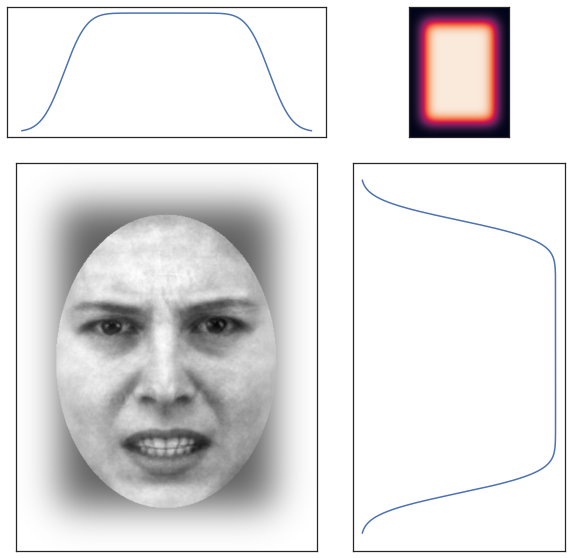

In [24]:
images = ['000','200', '050','150', '100']
file = f'/{paths.fad_stimuli}/F_{images[0]}.tif'
print(file)
with cbook.get_sample_data(file) as image_file:
        image = plt.imread(image_file)



fig, axes = plt.subplot_mosaic([['a','alphas'],['b','c']], figsize=(10,10),
gridspec_kw={ 'wspace':0.1, 'hspace':0.1, 'height_ratios': [1,3], 'width_ratios': [3,2]})


x = np.linspace(0, 205, 205)
y = np.linspace(0, 265, 265)

x_mask = norm.cdf(x, 60, 25)
x_mask = np.concatenate([x_mask, np.flip(x_mask)])

y_mask = norm.cdf(y, 60, 25)
y_mask = np.concatenate([y_mask, np.flip(y_mask)])


x0 = 205; a = 300  # x center, half width
y0 = 265; b = 365  # y center, half height
x = np.linspace(-10, 10, 100)  # x values of interest
y = np.linspace(-5, 5, 100)[:,None]  # y values of interest, as a "column" array


# sizex, sizey = 410, 530 
# sigma_x,sigma_y = 200, 150
# x = np.array([np.arange(sizex)])-sizex/2
# y = np.transpose(np.array([np.arange(sizey)]))-sizey/2
# alphas  = 1/(2*np.pi*sigma_x*sigma_y) * np.exp(-(x**2/(2*sigma_x**2) + y**2/(2*sigma_y**2)))
alphas = np.ones(image.shape)
# alphas = ellipse_fun(alphas, (270, 205), 200,145,-1)

alphas[:] = alphas * x_mask

alphas[:] = alphas * y_mask[:, np.newaxis]
alphas = (alphas-np.min(alphas))/(np.max(alphas)-np.min(alphas))


axes['a'].plot(range(410), x_mask)
axes['c'].plot(y_mask, range(530))
axes['b'].imshow(image, alpha=alphas, cmap='gray')
axes['alphas'].imshow(alphas)

axes['a'].set_yticks([])
axes['a'].set_xticks([])
axes['b'].set_yticks([])
axes['b'].set_xticks([])
axes['c'].set_yticks([])
axes['c'].set_xticks([])
axes['alphas'].set_yticks([])
axes['alphas'].set_xticks([])



/home/malthe/Documents/git/Respiratory_DDM/figures/fad_stimuli/F_000.tif


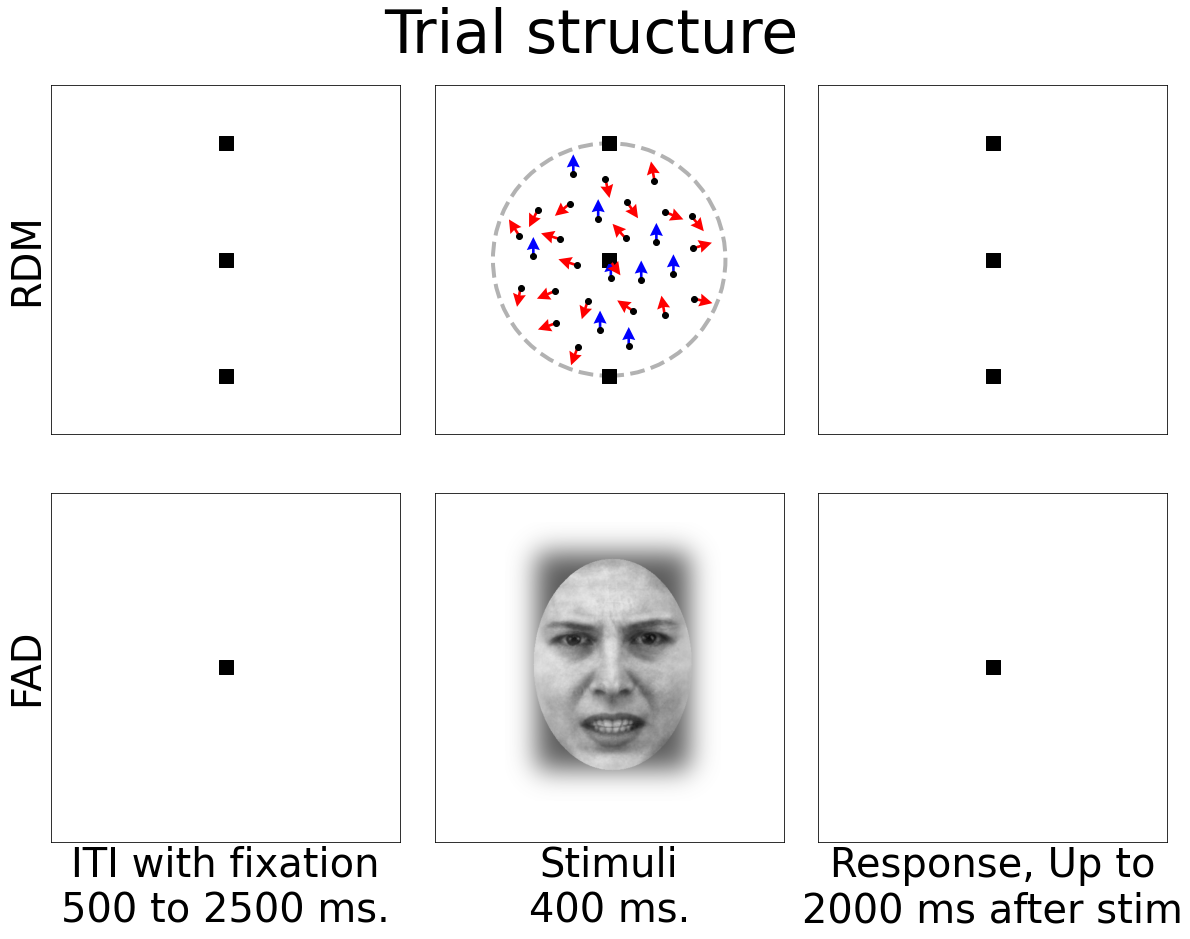

In [5]:
fig, axes = plt.subplots(2,3,  figsize=(20, 15), sharey=True, sharex=True,
gridspec_kw={ 'wspace':0.1, 'hspace':0})

background_col = 'white'#'darkgrey'#'gainsboro'
# axis labels
label_size = 40
fig.suptitle('Trial structure', fontsize=label_size*1.5, y=0.925)
axes[0,0].set_ylabel('RDM', size=label_size)
axes[1,0].set_ylabel('FAD', size=label_size)
axes[1,0].set_xlabel('ITI with fixation\n500 to 2500 ms.', size=label_size)
axes[1,1].set_xlabel('Stimuli\n400 ms.', size=label_size)
axes[1,2].set_xlabel('Response, Up to\n2000 ms after stim', size=label_size)

# Settings for RDM
for a in axes[0]:
    a.scatter([0,0,0], [-1, 0, 1], marker='s', color='k', s=200)
# Settings for FAD
for a in axes[1]:
    a.scatter([0], [0], marker='s', color='k', s=200)


# ITI/fixation
    # RDM
    # FAD
# Stimuli
    # RDM
n = 30
dots = 30
pCohere = .3
alpha = 1
# Number of points respectively on the boundary and inside the cirlce.
n_exterior = np.round(alpha * np.sqrt(n)).astype(int)
n_interior = n - n_exterior
# Ensure there are still some points in the inside..
if n_interior < 1:
    raise RuntimeError(f"Parameter 'alpha' is too large ({alpha}), all "
                        f"points would end-up on the boundary.")
# Generate the angles. The factor k_theta corresponds to 2*pi/phi^2.
k_theta = np.pi * (3 - np.sqrt(5))
angles = np.linspace(k_theta, k_theta * n, n)
# Generate the radii.
r_interior = np.sqrt(np.linspace(0, 1, n_interior))
r_exterior = np.ones((n_exterior,))
r = np.concatenate((r_interior, r_exterior))*.8
# Return Cartesian coordinates from polar ones.
points = r * np.stack((np.cos(angles), np.sin(angles)))
random_points = random.sample(range(n), dots)

# signal direction
signal_dots = random.sample(random_points, int(dots*pCohere))
signal_points_x, signal_points_y = points[0][signal_dots], points[1][signal_dots]
#axes[0,1].scatter(signal_points_x, signal_points_y , c='k', marker=(3, 0, 0), alpha =0.2, s=600)
axes[0,1].quiver(signal_points_x,signal_points_y,[0]*len(signal_points_x),[1]*len(signal_points_x), alpha= 1, color='b',headwidth=5)

# noise direction
noise_dots = [dot for dot in random_points if dot not in signal_dots]
for dot in noise_dots:
    #axes[0,1].scatter(points[0][dot], points[1][dot], c='k', marker=(3, 0, random.uniform(0,360)), alpha =0.2, s=600)
    arrow_dir1 = random.uniform(-1,1)
    arrow_dir2 = random.uniform(-1,1)
    a=random.uniform(0,360)
    axes[0,1].quiver(points[0][dot], points[1][dot],arrow_dir1,arrow_dir1, alpha= 1, angles=a, color='r', headwidth=5)



# plot points
points_x, points_y = points[0][random_points], points[1][random_points]
axes[0,1].scatter(points_x, points_y , c='k')


#
draw_circle = plt.Circle((0., 0.), 1, fill=False, linestyle = '--', color='k', alpha = 0.3, linewidth=4)
axes[0,1].add_artist(draw_circle)


# FAD

images = ['000','200', '050','150', '100']
file = f'{paths.fad_stimuli}/F_{images[0]}.tif'
print(file)
with cbook.get_sample_data(file) as image_file:
        image = plt.imread(image_file)



#r = trial - start + 150
b = 0
tIm = 400
width = 0.2
a = plt.axes([0.415, .19, width, width*530/410])
a.spines['top'].set_visible(False)
a.spines['right'].set_visible(False)
a.spines['bottom'].set_visible(False)
a.spines['left'].set_visible(False)
a.set_yticks([])
a.set_xticks([])

scale= 100

x_mask = norm.pdf(range(410), loc=410/2, scale=scale)
x_mask =  (x_mask - np.min(x_mask)) / (np.max(x_mask) - np.min(x_mask))

y_mask = norm.pdf(range(530), loc=530/2, scale=scale)
y_mask =  (y_mask - np.min(y_mask)) / (np.max(y_mask) - np.min(y_mask))


im = a.imshow(image, cmap='gray', vmin=0, vmax=255, alpha=alphas)#, extent=(tIm,r,b,tIm), origin='lower')
a.set_facecolor(background_col)
# Response
    # RDM
    # FAD


# settings for all subplots
for a in axes.flatten():
    a.set_facecolor(background_col)                # color
    a.set_aspect('equal', adjustable='box')     # shape = square
    a.set_xlim(-1.5,1.5)
    a.set_ylim(-1.5,1.5)
    # remove all spines and ticks
    # a.spines['top'].set_visible(False)
    # a.spines['right'].set_visible(False)
    # a.spines['bottom'].set_visible(False)
    # a.spines['left'].set_visible(False)
    a.set_yticks([])
    a.set_xticks([])

fig.savefig(str(paper_figs_path)+'/trials.png', bbox_inches='tight')



/home/malthe/Documents/git/Respiratory_DDM/code/figures/plotting_functions.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  currentStaircase['trialNumber']=range(currentStaircase.shape[0])
/home/malthe/Documents/git/Respiratory_DDM/code/figures/plotting_functions.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  currentStaircase['trialNumber']=range(currentStaircase.shape[0])
/home/malthe/Documents/git/Respiratory_DDM/code/figures/plotting_functions.py:46: SettingWithCopyWarning: 
A value is trying t

0: mean 0.21, SD 0.14, range 0.07-0.5
0
1: mean 52.74, SD 8.99, range 29.46-69.41
1


/home/malthe/Documents/git/Respiratory_DDM/code/figures/plotting_functions.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  currentStaircase['trialNumber']=range(currentStaircase.shape[0])
/home/malthe/Documents/git/Respiratory_DDM/code/figures/plotting_functions.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  currentStaircase['trialNumber']=range(currentStaircase.shape[0])
/home/malthe/Documents/git/Respiratory_DDM/code/figures/plotting_functions.py:46: SettingWithCopyWarning: 
A value is trying t

cRDM had a staircase
emotion had a staircase


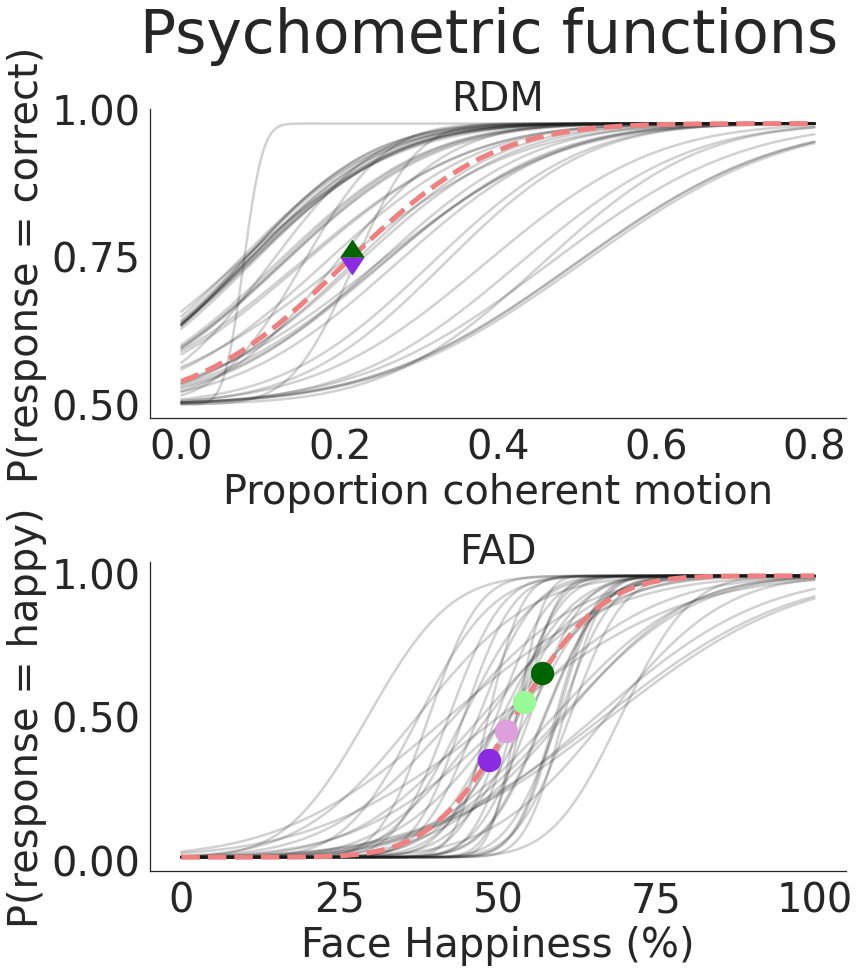

In [16]:
importlib.reload(pf)

pf.thresholds_combined(data, ['cRDM','emotion'],
 save=paper_figs_path+'/psychometric.png', show_mean=True, color_curves='k', fontsize=40, nSubjects=None)

for task in ['cRDM', 'emotion']:
    print(f'{task} had a staircase')

/home/malthe/Documents/git/Respiratory_DDM
0
//home/malthe/Documents/git/Respiratory_DDM/figures/fad_stimuli/F_000.tif
1
//home/malthe/Documents/git/Respiratory_DDM/figures/fad_stimuli/F_200.tif
2
//home/malthe/Documents/git/Respiratory_DDM/figures/fad_stimuli/F_050.tif
3
//home/malthe/Documents/git/Respiratory_DDM/figures/fad_stimuli/F_150.tif


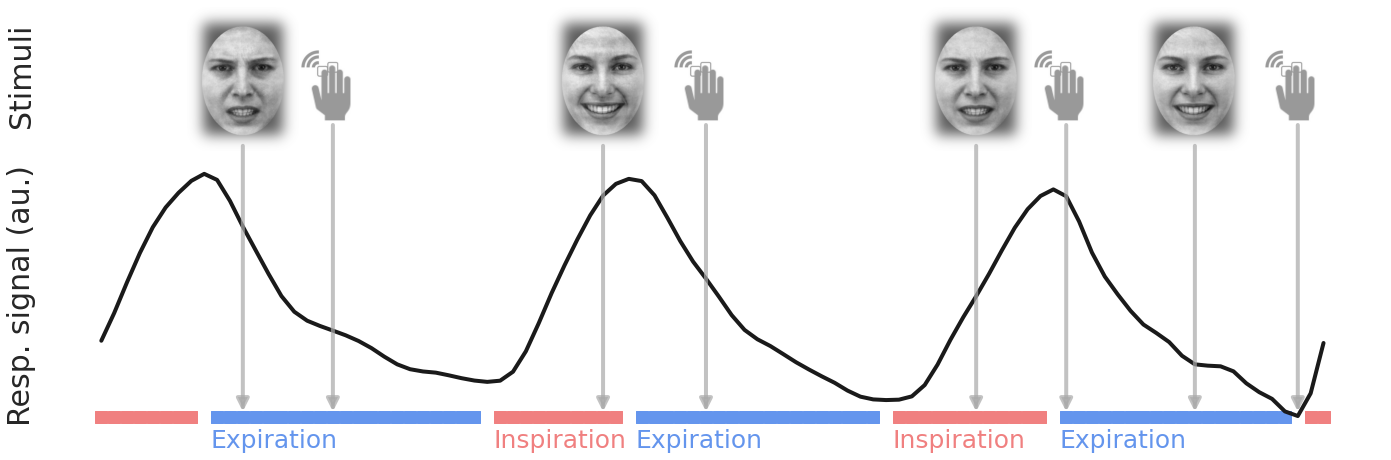

In [37]:
importlib.reload(paths)

rawPath=paths.raw
subject = '0019'

for file in os.listdir(rawPath):
        if '0019' in file:
                if 'trialLogs' in file:
                        trialsName = file
                elif 'timeSeries' in file:
                        seriesName = file


trials, physio = pd.read_csv(rawPath / trialsName), pd.read_csv(rawPath / seriesName)
stimIndexes = pf.findStimIndexes(physio.stim)



resp = physio.respSignal

filtered = rc.butter_lowpass_filter(resp, 1, 10, 5) # no filtering due to the low sampeling freq
normalizedNFiltered = rc.zScore(resp)
normalized = rc.zScore(resp)
peaks, troughs = rc.findPeaksAndTroughs(normalized, prominence=0.2,  dist=1, sFreq=10)

respAngleDInterSeries = rc.getRespPhaseSeries(normalized, peaks, troughs)


# Check if number of stimuli in the physio file match number of trials in the log
if len(stimIndexes) == len(trials):
    trials['onset'] = stimIndexes # add trial onset times to trials df
    trials['responsI'] = rc.responsIndexes(trials.onset, trials.rt, 10)
    #trials['responsI'] = trials.loc[trials['responsI'].notnull(), 'responsI'] = trials.loc[trials['responsI'].notnull(), 'responsI'].apply(int)
else:
    warnings.warn('number of trials in log file do not match number of stimuli in physio file')
type(trials.responsI[0])


make_abstract_fig = True
if make_abstract_fig:
        start = 17000
        stop = 17096

        lw = 4

        t=range(stop-start)
        resp=normalizedNFiltered[start: stop]
        phase=np.array(respAngleDInterSeries[start: stop])

        
        
        sns.set(style="white")
        fig, axes = plt.subplots(2,1, figsize=(25, 10), sharey=False, sharex=False, gridspec_kw={ 'height_ratios':[1,2]})
        fig.tight_layout(pad=10.0, rect=[0.05, 0.05, 0.95, 1])
        plt.subplots_adjust(wspace=0.0, hspace=0.1)
        plt.rc('xtick', labelsize=20) 
        plt.rc('ytick', labelsize=200) 
        
        axesStim = 0
        axesResp = 1
        
        # plot stimuli images
        axes[axesStim].spines['top'].set_visible(False)
        axes[axesStim].spines['right'].set_visible(False)
        axes[axesStim].spines['bottom'].set_visible(False)
        axes[axesStim].spines['left'].set_visible(False)
        axes[axesStim].yaxis.set_visible(True)
        axes[axesStim].get_xaxis().tick_bottom()
        axes[axesStim].set_yticks([])
        axes[axesStim].set_xticks([10000])
        axes[axesStim].set_ylabel('Stimuli', fontsize=30)
        axes[axesStim].set_xlim(0,100)
        axes[axesStim].set_ybound(0,100)
        axes[axesStim].set_xbound(0,300)

        # load response image
        response_img = paths.respons_image
        with cbook.get_sample_data(response_img) as image_file:
                                response = plt.imread(image_file)

        
        
        insp = np.where(phase=='inspiration')
        exp = np.where(phase == 'expiration')
        mark='s'
        s=150
        for i in insp[0]:
                axes[axesResp].scatter(i,-1, c='lightcoral', marker=mark, s=s)
        for i in exp[0]:
                axes[axesResp].scatter(i,-1, c='cornflowerblue', marker=mark, s=s)
        nPhase = 0
        for i in range(len(phase)):         
                if (i == 0 or phase[i] != phase[i-1]) & (phase[i] not in ['peak', 'trough']):
                        if (nPhase >0) & ((nPhase <6)):
                                text = 'Inspiration' if phase[i] == 'inspiration' else 'Expiration'
                                c = 'lightcoral' if phase[i] == 'inspiration' else 'cornflowerblue'
                                axes[axesResp].text(x=i-.5, y=-1.3, s=text, color=c, size=25)
                        nPhase +=1

                
                
        # expStart = np.where(pDiff<-2)[0]+ 2
        # expEnd = np.where(phaseArray==0)[0] + 0
        # inspStart = np.where(phaseArray==0)[0] +0
        # inspEnd = np.where(pDiff<-2)[0] +2

        # print(inspStart)
        # print(inspEnd)
        # print(expStart)
        # print(expEnd)
        
        
        # for i in range(len(inspStart)):

        #         axes[axesResp].plot([expStart[i], expEnd[i]],[-1,-1], color='cornflowerblue', linewidth=5)
        #         axes[axesResp].text(x=expEnd[i]+5, y=-1.25, s='Expiration', color='cornflowerblue', size=30)
        #         if i < 2:
        #                 axes[axesResp].plot([inspStart[i+1], inspEnd[i]],[-1,-1], color='lightcoral', linewidth=5)
        #                 axes[axesResp].text(x=inspEnd[i]-1, y=-1.25, s='Inspiration', color='lightcoral', size=30)
                
       

        # plot trial objects
        i=0
        phases = []
        for trial, r in zip(trials.onset, trials.responsI):
                if start < trial < stop:
  
                        images = ['000','200', '050','150', '100']
                        print(i)
                        file= f'/{paths.fad_stimuli}/F_{images[i]}.tif'
                        i+=1
                        print(file)
                        with cbook.get_sample_data(file) as image_file:
                                image = plt.imread(image_file)


                        l = trial - start - 150
                        #r = trial - start + 150
                        b = 0
                        tIm = 400
                        a = plt.axes([0.194+(trial-start-11)/140, .63, .1, .2])

                        im = a.imshow(image, cmap='gray', vmin=0, vmax=255, alpha=alphas)#, extent=(tIm,r,b,tIm), origin='lower')
                        a.spines['top'].set_visible(False)
                        a.spines['right'].set_visible(False)
                        a.spines['bottom'].set_visible(False)
                        a.spines['left'].set_visible(False)
                        a.set_yticks([])
                        a.set_xticks([])

                        # # draw response symbols
                        # c = ['g', 'yellow', 'y', '#caa0ff']
                        # axes[axesResp].scatter(trial-start, phase[trial-start], color=c[i], s=500, zorder=20)


                        #plt.axvline((trial-start), color='r')

                        # draw stimuli arrows
                        xyA = (trial-start, resp[trial])
                        coordsA = "data"
                        coordsB = "data"
                        phase[trial-start]
                        respStart = (trial-start, 1.6)#resp[trial]-0.3)
                        respEnd = (trial-start, -1)

                        con = ConnectionPatch(
                        xyA=respStart, coordsA=axes[axesResp].transData,
                        xyB=respEnd, coordsB=axes[axesResp].transData,
                        arrowstyle="-|>", shrinkB=5, color='darkgray', mutation_scale=25, alpha=0.7)#,mutation_aspect=100)
                        con.set_linewidth(4)
                        fig.add_artist(con)
                        #phases.append(phase[trial-start-1])

                        # draw responses arrows
                        xyA = (r-start, resp[r])
                        phase[r-start]
                        respStart = (r-start, 1.8)#resp[trial]-0.3)
                        respEnd = (r-start, -1)
                        con = ConnectionPatch(
                        xyA=respStart, coordsA=axes[axesResp].transData,
                        xyB=respEnd, coordsB=axes[axesResp].transData,
                        arrowstyle="-|>", shrinkB=5, color='darkgray', mutation_scale=25, alpha=0.7)
                        con.set_linewidth(4)
                        fig.add_artist(con)
                        phases.append(phase[r-start-1])
                        
                        # response symbol
                        l = trial - start - 150
                        #r = trial - start + 150
                        b = 0
                        tIm = 400
                        a = plt.axes([0.194+(r-start-8)/140, .67, .05, .1])

                        im = a.imshow(response, cmap='gray', vmin=0, vmax=255, alpha=0.4)#, extent=(tIm,r,b,tIm), origin='lower')
                        a.spines['top'].set_visible(False)
                        a.spines['right'].set_visible(False)
                        a.spines['bottom'].set_visible(False)
                        a.spines['left'].set_visible(False)
                        a.set_yticks([])
                        a.set_xticks([])
                        
                        #i+=1
                        
        # plot resp trace
        axes[axesResp].spines['top'].set_visible(False)
        axes[axesResp].spines['right'].set_visible(False)
        axes[axesResp].spines['bottom'].set_visible(False)
        axes[axesResp].spines['left'].set_visible(False)

        axes[axesResp].yaxis.set_visible(True)
        axes[axesResp].get_xaxis().tick_bottom()

        axes[axesResp].set_yticks([])
        axes[axesResp].set_xticks([10000])

        axes[axesResp].plot(t, resp, color='k', linewidth=lw, alpha=1)
        axes[axesResp].set_ylabel('Resp. signal (au.)', fontsize=30)

fig.savefig(paper_figs_path+'/trial_phases_stimuli_responses.png', bbox_inches='tight')

/home/malthe/Documents/git/Respiratory_DDM/figures/paper_figs/trials.png
/home/malthe/Documents/git/Respiratory_DDM/figures/paper_figs/trial_phases_stimuli_responses.png
/home/malthe/Documents/git/Respiratory_DDM/figures/paper_figs/psychometric.png
{'resp': <AxesSubplot:label='resp'>, 'trials': <AxesSubplot:label='trials'>, 'psychometric': <AxesSubplot:label='psychometric'>}


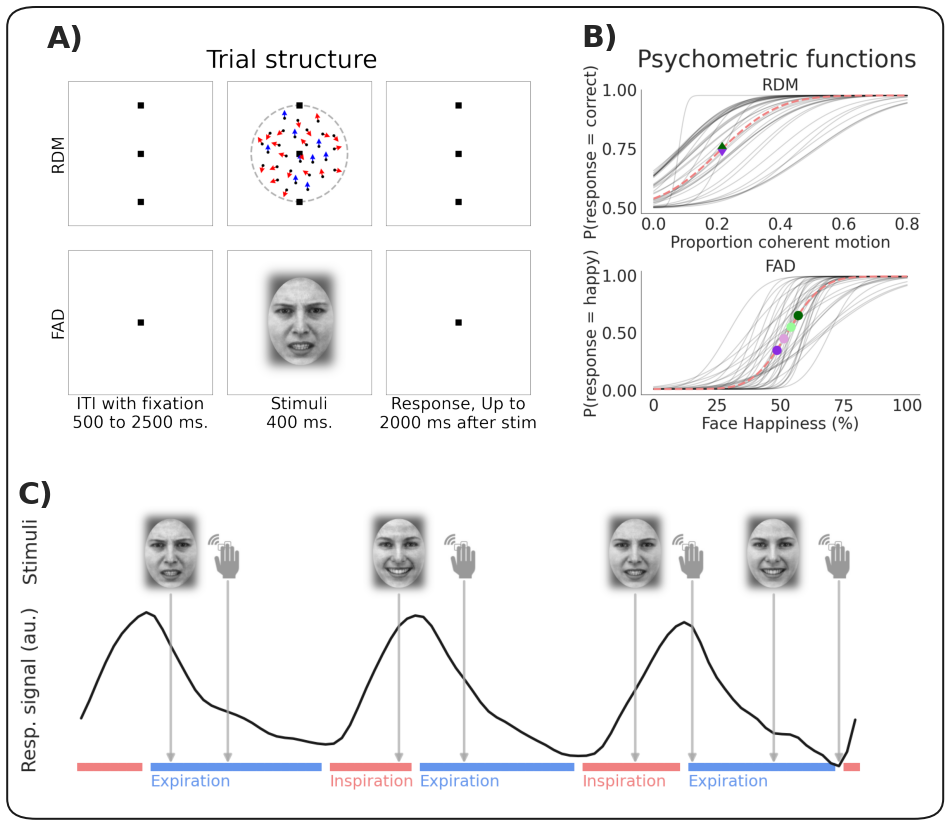

In [17]:
structure = [['trials', 'psychometric'],
             ['resp', 'resp']]



fig, axes = plt.subplot_mosaic(structure, figsize=(20, 13.75),
 gridspec_kw={ 'wspace':-0.3, 'hspace':0.2, 'height_ratios': [4,3], 'width_ratios': [3,2]})#,'height_ratios': [1,1],, 'width_ratios': [1,2]
#fig.tight_layout( rect=[0.00, 0.00, 1, 1])
#fig.tight_layout(rect=[0, 0.00, .7, 1])


# axes.spines['top'].set_visible(False)
# axes.spines['right'].set_visible(False)
# axes.spines['bottom'].set_visible(False)
# axes.spines['left'].set_visible(False)
# axes.spines['top'].set_visible(False)
# axes.spines['right'].set_visible(False)
# axes.spines['bottom'].set_visible(False)
# axes.spines['left'].set_visible(False)
# axes.set_yticks([])
# axes.set_xticks([])


file0=paper_figs_path+'/trials.png'
print(file0)
with cbook.get_sample_data(file0) as image_file:
    image = plt.imread(image_file)
im = axes['trials'].imshow(image)#, extent=(tIm,r,b,tIm), origin='lower')




file2=paper_figs_path+'/trial_phases_stimuli_responses.png'
print(file2)
with cbook.get_sample_data(file2) as image_file:
    image = plt.imread(image_file)

#b = plt.axes([0.00, 0.00, 1, 1])
im = axes['resp'].imshow(image)#, extent=(tIm,r,b,tIm), origin='lower')


file1=paper_figs_path+'/psychometric.png'
print(file1)
with cbook.get_sample_data(file1) as image_file:
    image = plt.imread(image_file)
im = axes['psychometric'].imshow(image)#, extent=(tIm,r,b,tIm), origin='lower')

print(axes)

for a in axes.values():
    #a.set_aspect('equal', adjustable='box')
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['bottom'].set_visible(False)
    a.spines['left'].set_visible(False)
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['bottom'].set_visible(False)
    a.spines['left'].set_visible(False)
    a.set_yticks([])
    a.set_xticks([])

for a,letter in zip(axes, ['C)','A)','B)']):

    axes[a].text(-0.2, 1.2, letter, 
            size=30, weight='bold')

# rect = plt.Rectangle(
#     # (lower-left corner), width, height
#     (0.2, 0.1), 0.65, .825, fill=False, color="k", lw=2, 
#     zorder=1000, transform=fig.transFigure, figure=fig
# )
# fig.patches.extend([rect])

frame = mpatches.FancyBboxPatch((0.5, 0.4), .05, .22,fill=False, color="k", lw=2, 
                            zorder=1000, transform=fig.transFigure, figure=fig,
                            boxstyle='round,rounding_size=0.02')
frame.rounding_size=1

fig.patches.extend([frame])

fig.savefig(paths.experiment_setup_fig, bbox_inches='tight')

-0.385
//home/malthe/Documents/git/Respiratory_DDM/figures/fad_stimuli/F_000.tif
-0.16760869565217393
//home/malthe/Documents/git/Respiratory_DDM/figures/fad_stimuli/F_050.tif
0.04978260869565215
//home/malthe/Documents/git/Respiratory_DDM/figures/fad_stimuli/F_100.tif
0.26717391304347826
//home/malthe/Documents/git/Respiratory_DDM/figures/fad_stimuli/F_150.tif
0.4845652173913043
//home/malthe/Documents/git/Respiratory_DDM/figures/fad_stimuli/F_200.tif


/home/malthe/.conda/envs/HDDM36/lib/python3.6/site-packages/ipykernel_launcher.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


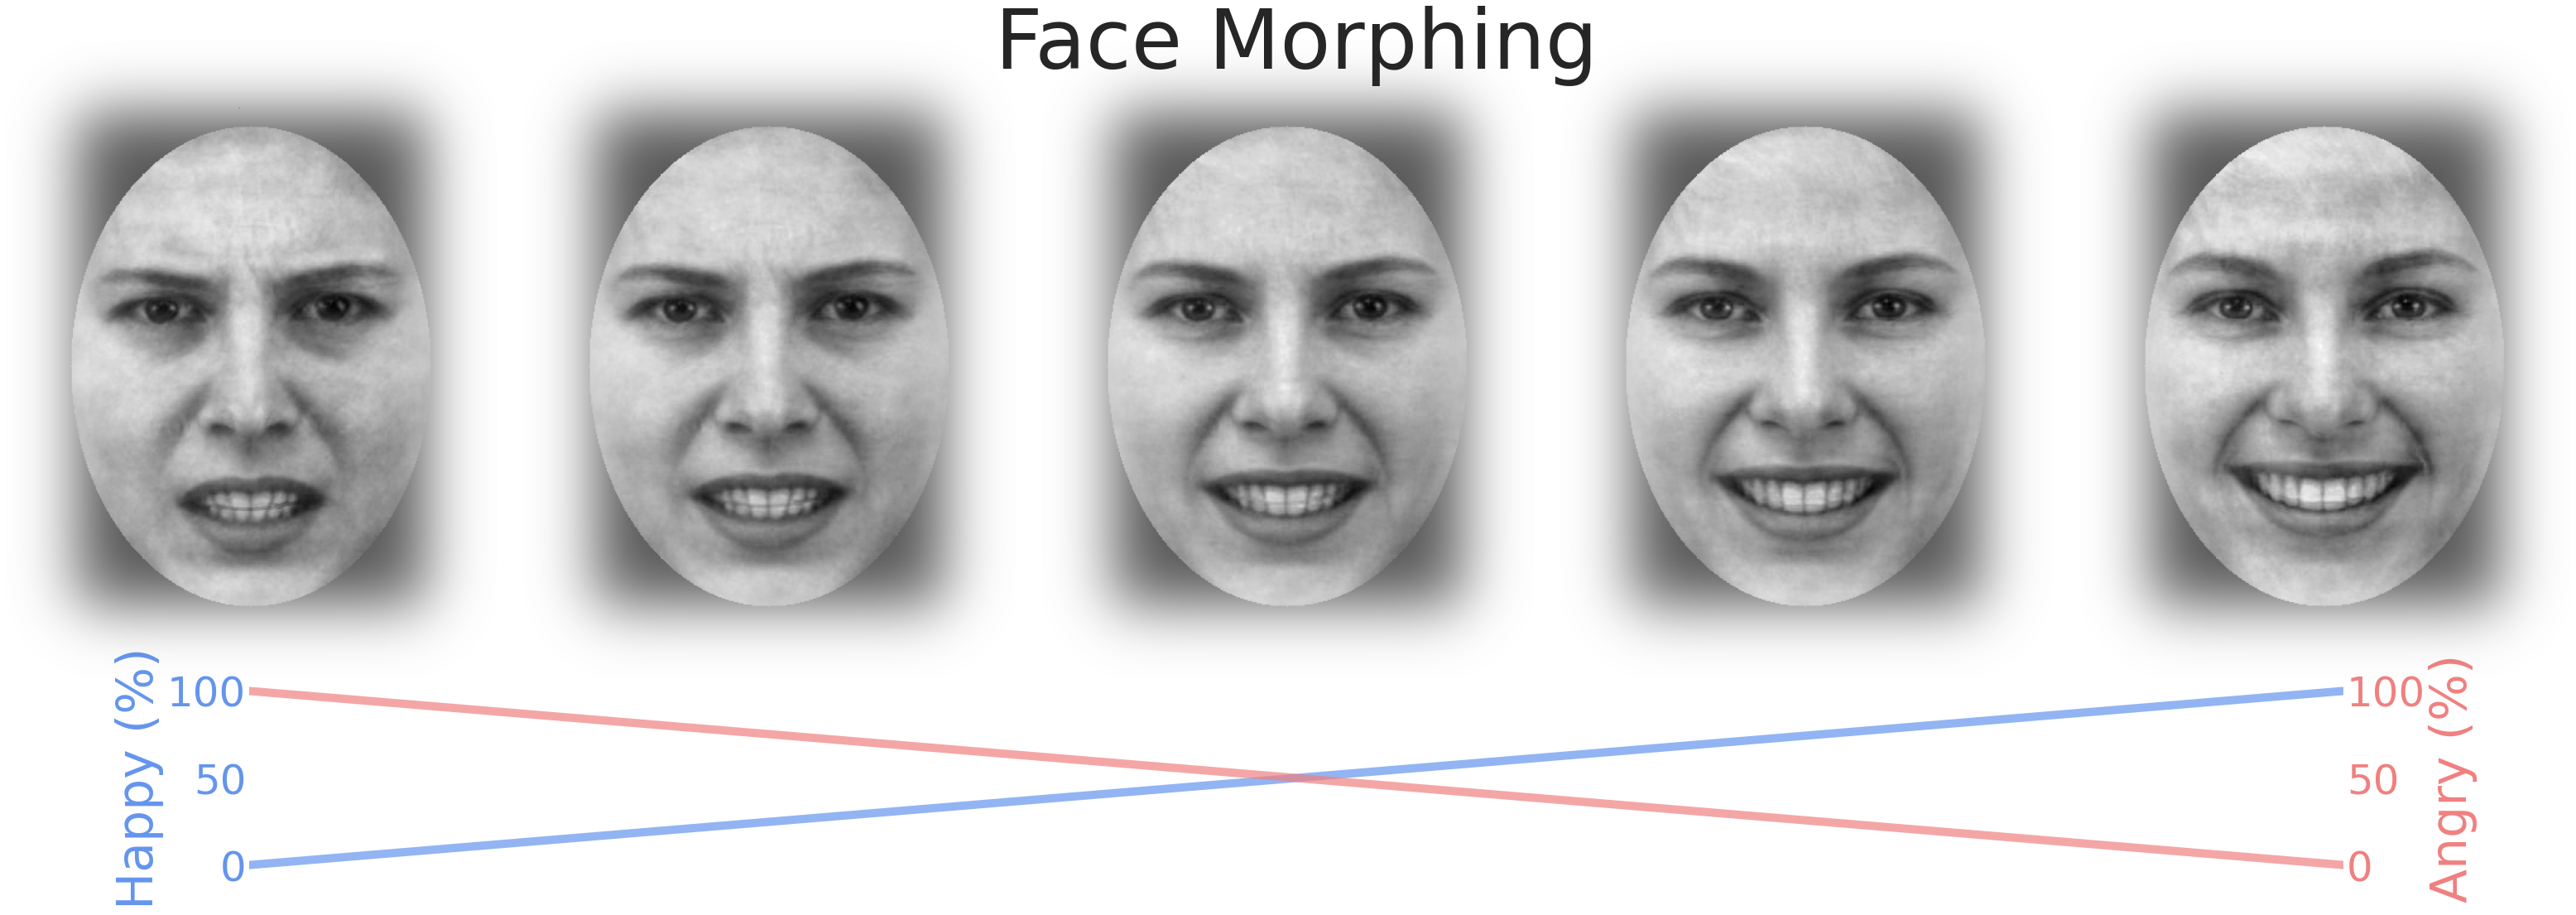

In [258]:
fig, ax = plt.subplots(2,1,figsize=(40,15),
                       gridspec_kw={ 'height_ratios':[3,1], 'hspace':0}, sharex=False)
fig.suptitle('Face Morphing', size=100, y=1)
ylab = 60
yts=50
lw=10
la=0.7
happy_c = 'cornflowerblue'
angry_c = 'lightcoral'
#ax[0].set_ylabel('Stimuli', fontsize=ylab, )
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].set_xticks([])



b, w = 0.25, 0.55
h = 1.2926829268292683 * w


images = ['000','050', '100','150', '200']
locks = np.arange(0,201,50)
for i, l in zip(images, locks):
        l = l/230-0.385
        print(l)
        file= f'/{paths.fad_stimuli}/F_{i}.tif'
        print(file)
        with cbook.get_sample_data(file) as image_file:
            image = plt.imread(image_file)
        newax = fig.add_axes([l, b, w, h], anchor='NE', zorder=1)
        newax.imshow(image,alpha=alphas, vmax=255, cmap='gray')
        newax.axis('off')
        
        
 
ax2 = ax[1].twinx()
ax2.plot([100,0],[0,100], c=angry_c, linewidth= lw, alpha= la)
ax[1].plot([0,100],[0,100], c=happy_c, linewidth= lw, alpha= la)


# giving labels to the axises
ax[1].set_ylabel('Happy (%)', color = happy_c, fontsize=ylab)
ax2.set_ylabel('Angry (%)', color = angry_c, fontsize=ylab,)
 

#ax[1].set_yticks([0,25,50,75,100])
ax[1].set_xticks([])
ax[1].set_yticks([0,50,100])
ax2.set_yticks([0,50,100])

ax[1].set_xlim([0,100])




#ax[1].set_yticklabels(['100', '50', '0'])
ax[1].tick_params(axis='both', which='major', labelsize=yts, labelcolor=happy_c,length=0)
ax2.tick_params(axis='both', which='major', labelsize=yts, labelcolor=angry_c, length=0)


ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

fig.savefig(supp_figs_path+'/emo_stim.png', bbox_inches='tight')